### EDF to CSV along with resampling

In [14]:
import os
import mne

path = '/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00'
# path = '/content/physionet.org/files/siena-scalp-eeg/1.0.0'

edfFiles = []
txtFiles = []
# r=root, d=directories, f=files
for r, d, f in os.walk(path):
    for file in f:
        if file.endswith('.edf'):
            edfFiles.append(os.path.join(r, file))
        elif file.endswith('.txt'):
            txtFiles.append(os.path.join(r, file))

edfFiles = sorted(edfFiles)
txtFiles = sorted(txtFiles)

for edf_file, txt_file in zip(edfFiles, txtFiles):
    raw = mne.io.read_raw_edf(edf_file)
    raw_resampled = raw.resample(256, npad="auto")
    csv_file = os.path.splitext(edf_file)[0] + '.csv'
    raw_resampled.to_data_frame().to_csv(csv_file, index=False)
    print(f"Resampled {edf_file} to 256Hz and saved as {csv_file}")
    

Extracting EDF parameters from /Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Resampled /Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf to 256Hz and saved as /Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.csv


### Analysing and working with different datasets 

In [71]:
# df = pd.read_csv('/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.csv')
df = pd.read_csv('/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1_out.csv')
df2 = pd.read_csv("/Users/madhavp/DRL/chbmit_preprocessed_data.csv")
df3 = pd.read_csv("/Users/madhavp/DRL/SeizureDetection/CHB_Res_rand.csv")


In [46]:
df.shape

(672000, 37)

In [47]:
df

,time,EEG Fp1,EEG F3,EEG C3,EEG P3,EEG O1,EEG F7,EEG T3,EEG T5,EEG Fc1,...,EEG Cp2,EEG Cp6,EEG F10,EKG EKG,SPO2,HR,1,2,MK,outcome
0,0.000000,1.877707,-10.002317,-0.880476,-10.878180,-5.624144,-26.375820,2.253975,8.248999,0.622153,...,5.354172,3.477072,1.493780,7686.040731,0.0,0.0,-15.875199,-187.875667,40.0,0
1,0.003906,-2.522429,-12.052916,2.342388,-13.476547,-20.565055,-30.860366,-4.727078,-5.081658,2.409169,...,9.297601,14.217235,-2.910287,7845.487889,0.0,0.0,-26.295415,-212.118037,40.0,0
2,0.007812,4.188907,-8.351802,3.433855,-14.453171,-19.610290,-22.674626,1.990090,-3.846256,2.277095,...,5.615996,6.522533,6.654834,7874.420969,0.0,0.0,-37.640055,-178.778280,40.0,0
3,0.011719,-1.794916,6.713629,8.957956,-9.787029,-17.136944,-20.878438,5.697271,-3.864633,6.258113,...,8.396397,7.997582,10.443443,7784.710442,0.0,0.0,-40.963642,-164.930025,40.0,0
4,0.015625,-20.122517,4.163490,7.673692,-11.404988,-20.671548,-30.578739,-3.678949,-1.285323,8.573494,...,7.878612,3.810082,8.257741,7715.717819,0.0,0.0,-41.657604,-172.937382,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671995,2624.980469,-1.130530,-2.162630,8.571660,2.824207,17.717608,14.884740,14.707246,16.036961,13.931254,...,14.173048,17.807832,23.536254,8174.551019,0.0,0.0,21.149081,-128.969122,40.0,0
671996,2624.984375,-22.585868,9.939871,10.216252,5.912022,21.390324,11.738990,13.355710,17.285526,18.403849,...,16.204507,20.278031,24.064514,8174.018729,0.0,0.0,20.729259,-129.393833,40.0,0
671997,2624.988281,-14.217702,12.764478,7.447151,4.168284,23.021517,10.916769,13.682035,18.720484,16.638515,...,13.599537,20.194903,27.694547,8173.851608,0.0,0.0,43.791385,-118.120641,40.0,0
671998,2624.992188,8.486448,13.341994,9.004855,5.272046,24.744597,17.763732,15.344104,18.923645,17.572962,...,14.341614,21.910229,24.147245,8174.274891,0.0,0.0,42.813633,-116.759614,40.0,0


In [67]:
df2

,# FP1-F7,C3-P3,C4-P4,CZ-PZ,F3-C3,F4-C4,F7-T7,F8-T8,FP1-F3,FP2-F4,...,P3-O1,P4-O2,P7-O1,P7-T7,P8-O2,T7-FT9,T7-P7,T8-P8-0,T8-P8-1,Outcome
0,0.000020,0.000010,0.000022,0.000037,0.000032,0.000035,0.000016,0.000046,-0.000007,0.000043,...,0.000024,-0.000030,0.000010,-0.000011,-0.000037,0.000008,0.000012,0.000021,0.000021,0.0
1,0.000022,0.000008,0.000021,0.000039,0.000030,0.000032,0.000015,0.000039,-0.000006,0.000042,...,0.000026,-0.000017,0.000012,-0.000008,-0.000029,0.000010,0.000009,0.000023,0.000023,0.0
2,0.000021,0.000012,0.000021,0.000040,0.000025,0.000030,0.000013,0.000036,-0.000006,0.000040,...,0.000027,-0.000018,0.000014,-0.000009,-0.000034,0.000012,0.000009,0.000027,0.000027,0.0
3,0.000019,0.000012,0.000021,0.000039,0.000023,0.000028,0.000013,0.000035,-0.000008,0.000036,...,0.000030,-0.000024,0.000015,-0.000009,-0.000042,0.000009,0.000010,0.000033,0.000033,0.0
4,0.000019,0.000012,0.000021,0.000036,0.000023,0.000024,0.000012,0.000024,-0.000009,0.000032,...,0.000032,-0.000014,0.000017,-0.000008,-0.000031,0.000009,0.000008,0.000035,0.000035,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,0.000081,0.000047,0.000087,0.000074,0.000113,0.000063,0.000129,-0.000037,0.000102,-0.000106,...,-0.000036,0.000072,-0.000046,-0.000060,0.000070,-0.000169,0.000060,0.000070,0.000070,1.0
2097146,0.000093,0.000055,0.000087,0.000082,0.000133,0.000058,0.000133,-0.000036,0.000088,-0.000115,...,-0.000031,0.000087,-0.000049,-0.000067,0.000076,-0.000152,0.000068,0.000063,0.000063,1.0
2097147,0.000110,0.000061,0.000078,0.000085,0.000146,0.000049,0.000130,-0.000036,0.000076,-0.000119,...,-0.000033,0.000106,-0.000058,-0.000067,0.000075,-0.000145,0.000067,0.000062,0.000062,1.0
2097148,0.000133,0.000068,0.000082,0.000085,0.000157,0.000040,0.000123,-0.000033,0.000067,-0.000124,...,-0.000036,0.000107,-0.000073,-0.000073,0.000068,-0.000129,0.000073,0.000056,0.000056,1.0


In [48]:
df.columns

Index(['time', 'EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7',
       'EEG T3', 'EEG T5', 'EEG Fc1', 'EEG Fc5', 'EEG Cp1', 'EEG Cp5',
       'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4',
       'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6',
       'EEG Cp2', 'EEG Cp6', 'EEG F10', 'EKG EKG', 'SPO2', 'HR', '1', '2',
       'MK', 'outcome'],
      dtype='object')

In [49]:
df = df.drop(['time','EEG T5','EEG Fc1','EEG Fc5','EEG Cp1','EEG Cp5','EKG EKG','SPO2','HR','1','2','MK','EEG Cp2'],axis=1)


In [50]:
df.shape

(672000, 24)

In [51]:
df.columns

Index(['EEG Fp1', 'EEG F3', 'EEG C3', 'EEG P3', 'EEG O1', 'EEG F7', 'EEG T3',
       'EEG F9', 'EEG Fz', 'EEG Cz', 'EEG Pz', 'EEG Fp2', 'EEG F4', 'EEG C4',
       'EEG P4', 'EEG O2', 'EEG F8', 'EEG T4', 'EEG T6', 'EEG Fc2', 'EEG Fc6',
       'EEG Cp6', 'EEG F10', 'outcome'],
      dtype='object')

In [52]:
df.to_csv('/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1_out_23.csv', index=False)


In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = df

In [55]:
# Display the first few rows of the DataFrame
# print(data.head())

# Check the dimensions of the DataFrame
print(data.shape)

# Check the data types of each column
print(data.dtypes)

# Calculate summary statistics of the data
print(data.describe())


(672000, 24)
EEG Fp1    float64
EEG F3     float64
EEG C3     float64
EEG P3     float64
EEG O1     float64
EEG F7     float64
EEG T3     float64
EEG F9     float64
EEG Fz     float64
EEG Cz     float64
EEG Pz     float64
EEG Fp2    float64
EEG F4     float64
EEG C4     float64
EEG P4     float64
EEG O2     float64
EEG F8     float64
EEG T4     float64
EEG T6     float64
EEG Fc2    float64
EEG Fc6    float64
EEG Cp6    float64
EEG F10    float64
outcome      int64
dtype: object
             EEG Fp1         EEG F3         EEG C3         EEG P3  \
count  672000.000000  672000.000000  672000.000000  672000.000000   
mean        4.803524       5.318121       3.131164       3.990574   
std        33.972023      26.301437      29.004054      40.193054   
min      -479.098526    -618.328811    -552.515813    -647.916098   
25%        -5.872776      -2.345416      -2.577426      -4.740644   
50%         3.229891       5.863984       6.317898       7.559172   
75%        13.016848      13.77581

In [68]:
print(df2.describe())

           # FP1-F7         C3-P3         C4-P4         CZ-PZ         F3-C3  \
count  2.097150e+06  2.097150e+06  2.097150e+06  2.097150e+06  2.097150e+06   
mean   2.860975e-07  2.240451e-07  2.069632e-07  2.165756e-07  1.987710e-07   
std    1.286452e-04  1.002525e-04  1.040703e-04  1.025700e-04  1.311180e-04   
min   -1.504078e-03 -1.349451e-03 -1.486105e-03 -1.452894e-03 -1.585348e-03   
25%   -4.480000e-05 -3.180000e-05 -3.150000e-05 -3.460000e-05 -4.120000e-05   
50%   -1.950000e-07  1.950000e-07  1.950000e-07  1.950000e-07  1.950000e-07   
75%    4.200000e-05  3.260000e-05  3.110000e-05  3.500000e-05  4.190000e-05   
max    1.465788e-03  1.682247e-03  1.950183e-03  1.960440e-03  1.799463e-03   

              F4-C4         F7-T7         F8-T8        FP1-F3        FP2-F4  \
count  2.097150e+06  2.097150e+06  2.097150e+06  2.097150e+06  2.097150e+06   
mean   1.810135e-07  2.261609e-07  2.413503e-07  2.743237e-07  2.484646e-07   
std    1.213935e-04  1.361053e-04  1.169298e-04  1.

In [72]:
print(df3.describe())

             FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
count  51714.000000  51714.000000  51714.000000  51714.000000  51714.000000   
mean       0.227561      0.231256      0.037679      0.180922      0.200196   
std       44.905517     37.321520     31.956460     32.311248     51.685562   
min     -507.741148   -557.362637   -354.578755   -315.506715   -487.814408   
25%      -16.605617    -15.042735    -15.824176    -16.996337    -21.684982   
50%        0.195360      0.195360      0.195360      0.195360      0.195360   
75%       16.605617     15.824176     16.214896     17.387057     22.075702   
max      656.214896    399.120879    351.062271    362.783883    790.231990   

              F3-C3         C3-P3         P3-O1        FP2-F4         F4-C4  \
count  51714.000000  51714.000000  51714.000000  51714.000000  51714.000000   
mean       0.243549      0.087990      0.140682      0.195950      0.326258   
std       51.711768     40.016114     36.160341    

In [74]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(df3)
print(df3.describe())

             FP1-F7         F7-T7         T7-P7         P7-O1        FP1-F3  \
count  51714.000000  51714.000000  51714.000000  51714.000000  51714.000000   
mean       0.227561      0.231256      0.037679      0.180922      0.200196   
std       44.905517     37.321520     31.956460     32.311248     51.685562   
min     -507.741148   -557.362637   -354.578755   -315.506715   -487.814408   
25%      -16.605617    -15.042735    -15.824176    -16.996337    -21.684982   
50%        0.195360      0.195360      0.195360      0.195360      0.195360   
75%       16.605617     15.824176     16.214896     17.387057     22.075702   
max      656.214896    399.120879    351.062271    362.783883    790.231990   

              F3-C3         C3-P3         P3-O1        FP2-F4         F4-C4  \
count  51714.000000  51714.000000  51714.000000  51714.000000  51714.000000   
mean       0.243549      0.087990      0.140682      0.195950      0.326258   
std       51.711768     40.016114     36.160341    

### Some frequency analysis

Extracting EDF parameters from /Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...
<Info | 7 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
>
Using matplotlib as 2D backend.


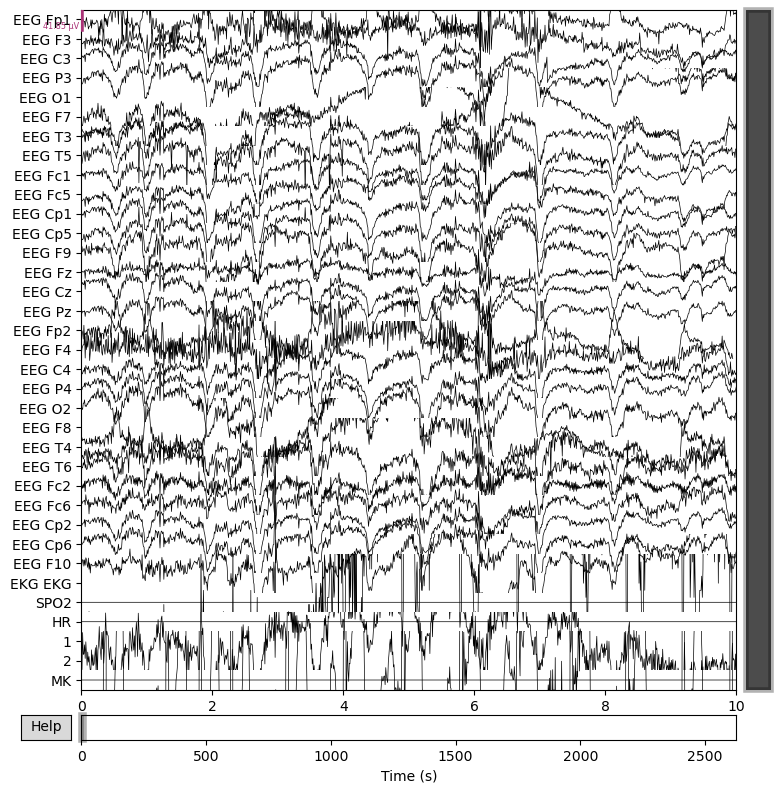

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_40497/1906103901.py:18: UserWarning: Zero value in spectrum for channels SPO2, HR, MK
  raw.plot_psd(fmin=0, fmax=100)
/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_40497/1906103901.py:18: UserWarning: Infinite value in PSD for channels SPO2, HR, MK.
These channels might be dead.
  raw.plot_psd(fmin=0, fmax=100)
/var/folders/fz/6jhdkfr50zg8znkw9c7rz0gm0000gn/T/ipykernel_40497/1906103901.py:18: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0, fmax=100)
/Users/madhavp/opt/anaconda3/lib/python3.9/site-packages/mne/viz/utils.py:151: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

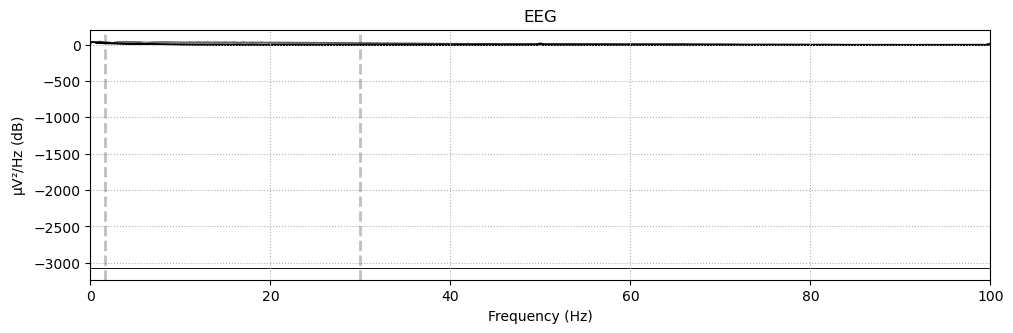

In [62]:
import mne

# Set the path to your EDF file
edf_file = '/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf'

# Load the EDF file
raw = mne.io.read_raw_edf(edf_file, preload=True)

# Perform EDA

# Print basic information about the data
print(raw.info)

# Plot the raw data
raw.plot(n_channels=35, duration=10, scalings='auto')

# Plot the power spectral density (PSD)
raw.plot_psd(fmin=0, fmax=100)

# Plot the events in the data
events = mne.find_events(raw)
mne.viz.plot_events(events, raw.info['sfreq'])

# Compute and plot epochs
event_id = {'event_name': event_code}  # Define your event names and codes
tmin, tmax = -1, 1  # Define the time window for epochs
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=None)
epochs.plot()

# Perform additional analysis and visualizations as needed



### Comparing both the datasets using plots

0.23125594078640446 0.195360195 -557.3626374 399.1208791
1
Column: F7-T7
Statistics for File 1:
Mean: 0.23125594078640446, Median: 0.195360195, Min: -557.3626374, Max: 399.1208791
Statistics for File 2:
Mean: 2.2616085687713016e-07, Median: 1.95e-07, Min: -0.001465006, Max: 0.001663492

0.037678821751478415 0.195360195 -354.5787546 351.0622711
2
Column: T7-P7
Statistics for File 1:
Mean: 0.037678821751478415, Median: 0.195360195, Min: -354.5787546, Max: 351.0622711
Statistics for File 2:
Mean: 1.9549018858923477e-07, Median: 2.93e-07, Min: -0.001611136, Max: 0.001686154

0.1809218098972813 0.195360195 -315.5067155 362.7838828
3
Column: P7-O1
Statistics for File 1:
Mean: 0.1809218098972813, Median: 0.195360195, Min: -315.5067155, Max: 362.7838828
Statistics for File 2:
Mean: 2.0195990177138687e-07, Median: 1.95e-07, Min: -0.001511795, Max: 0.001296215

0.20019565675741727 0.195360195 -487.8144078 790.2319902
4
Column: FP1-F3
Statistics for File 1:
Mean: 0.20019565675741727, Median: 0.19

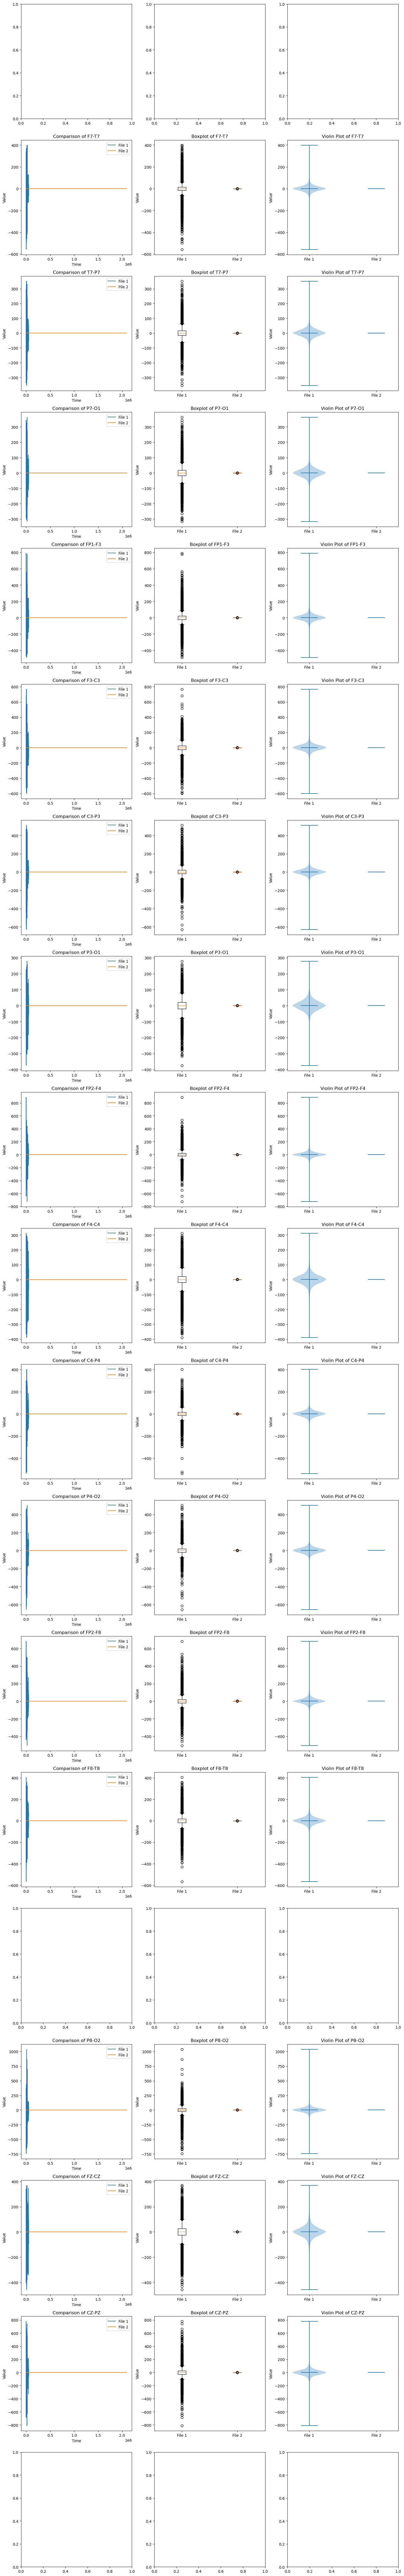

In [85]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV files into pandas dataframes
# df1 = pd.read_csv('/Users/madhavp/DRL/physionet.org/files/siena-scalp-eeg/1.0.0/PN00/PN00-1_out.csv')
df1 = pd.read_csv('/Users/madhavp/DRL/SeizureDetection/CHB_Res_rand.csv')
df2 = pd.read_csv('/Users/madhavp/DRL/chbmit_preprocessed_data.csv')

# Get the number of columns in the dataframes
num_cols = min(len(df1.columns), len(df2.columns))

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_cols, ncols=3, figsize=(15, 5*num_cols))

# Iterate over the columns in both dataframes and compare the statistics
for i, col in enumerate(df1.columns[:num_cols]):
    if col in df2.columns:
        # Calculate statistics for each column
        mean1 = df1[col].mean()
        mean2 = df2[col].mean()
        median1 = df1[col].median()
        median2 = df2[col].median()
        min1 = df1[col].min()
        min2 = df2[col].min()
        max1 = df1[col].max()
        max2 = df2[col].max()
        
#         print(mean1, median1, min1, max1)
        print(i)
        
        # Print the statistics
        print(f"Column: {col}")
        print("Statistics for File 1:")
        print(f"Mean: {mean1}, Median: {median1}, Min: {min1}, Max: {max1}")
        print("Statistics for File 2:")
        print(f"Mean: {mean2}, Median: {median2}, Min: {min2}, Max: {max2}")
        print()
        
        # Plot the comparison in the respective subplots
        # Line Plot
        axes[i, 0].plot(df1[col], label='File 1')
        axes[i, 0].plot(df2[col], label='File 2')
        axes[i, 0].set_xlabel('Time')
        axes[i, 0].set_ylabel('Value')
        axes[i, 0].set_title(f"Comparison of {col}")
        axes[i, 0].legend()
        
        # Box Plot
        axes[i, 1].boxplot([df1[col], df2[col]], labels=['File 1', 'File 2'])
        axes[i, 1].set_ylabel('Value')
        axes[i, 1].set_title(f"Boxplot of {col}")
        
        # Violin Plot
        axes[i, 2].violinplot([df1[col], df2[col]], showmedians=True)
        axes[i, 2].set_xticks([1, 2])
        axes[i, 2].set_xticklabels(['File 1', 'File 2'])
        axes[i, 2].set_ylabel('Value')
        axes[i, 2].set_title(f"Violin Plot of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Analysis on Siena scalp database

Column: FP1-F7
Mean: 0.22756134600931988, Median: 0.195360195, Min: -507.7411477, Max: 656.2148962

Column: F7-T7
Mean: 0.23125594078640446, Median: 0.195360195, Min: -557.3626374, Max: 399.1208791

Column: T7-P7
Mean: 0.037678821751478415, Median: 0.195360195, Min: -354.5787546, Max: 351.0622711

Column: P7-O1
Mean: 0.1809218098972813, Median: 0.195360195, Min: -315.5067155, Max: 362.7838828

Column: FP1-F3
Mean: 0.20019565675741727, Median: 0.195360195, Min: -487.8144078, Max: 790.2319902

Column: F3-C3
Mean: 0.24354859019867509, Median: 0.976800977, Min: -600.3418803, Max: 766.3980464

Column: C3-P3
Mean: 0.08799028639648825, Median: 0.195360195, Min: -628.8644689, Max: 510.8669109

Column: P3-O1
Mean: 0.14068170466566166, Median: 0.195360195, Min: -374.8962149, Max: 277.6068376

Column: FP2-F4
Mean: 0.19594951725675908, Median: 0.195360195, Min: -725.3724054, Max: 886.7399267

Column: F4-C4
Mean: 0.32625764612826796, Median: 0.976800977, Min: -389.3528694, Max: 311.2087912

Column:

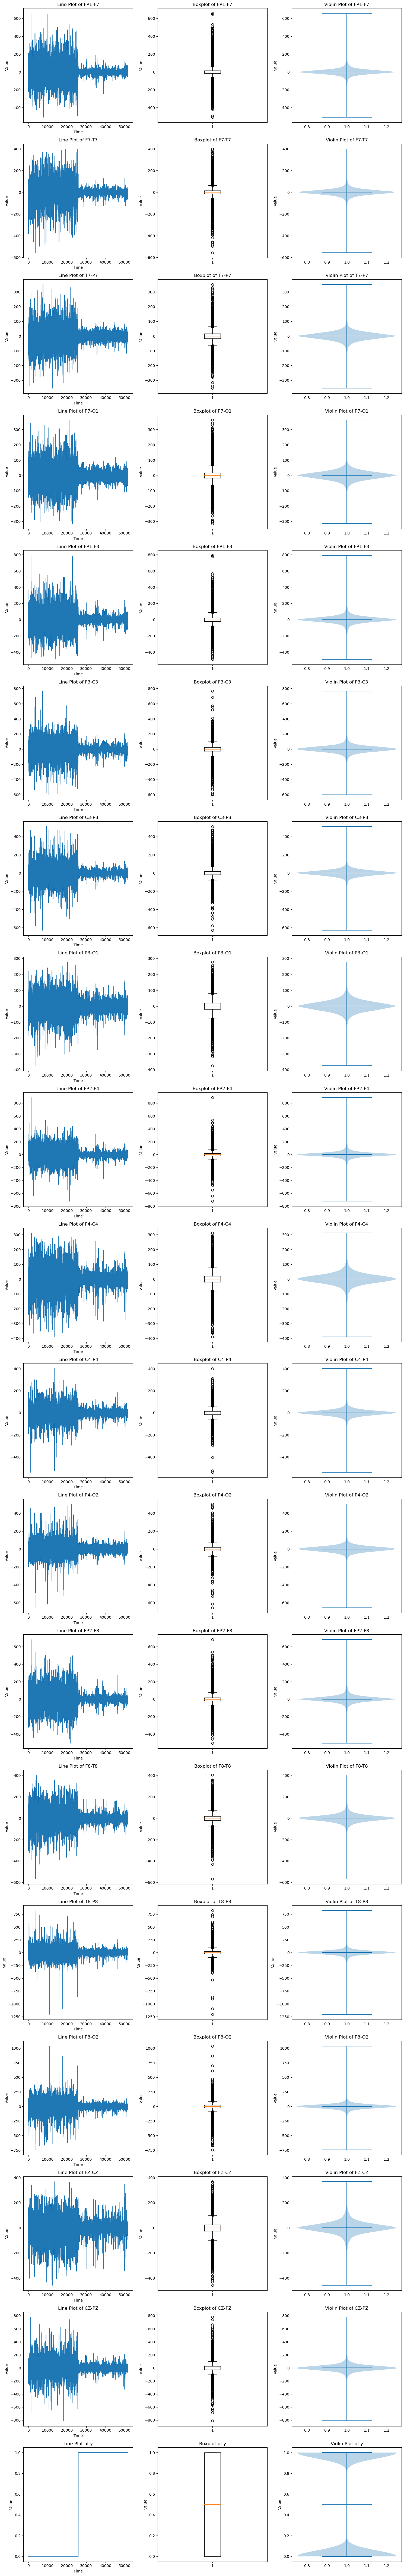

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/madhavp/DRL/SeizureDetection/CHB_Res_rand.csv')

# Get the number of columns in the dataframe
num_cols = len(df.columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_cols, ncols=3, figsize=(15, 5*num_cols))

# Iterate over the columns and compare the statistics
for i, col in enumerate(df.columns):
    # Calculate statistics for each column
    mean = df[col].mean()
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()

    # Print the statistics
    print(f"Column: {col}")
    print(f"Mean: {mean}, Median: {median}, Min: {min_val}, Max: {max_val}")
    print()

    # Plot the comparison in the respective subplots
    # Line Plot
    axes[i, 0].plot(df[col])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Value')
    axes[i, 0].set_title(f"Line Plot of {col}")

    # Box Plot
    axes[i, 1].boxplot(df[col])
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].set_title(f"Boxplot of {col}")

    # Violin Plot
    axes[i, 2].violinplot(df[col], showmedians=True)
    axes[i, 2].set_ylabel('Value')
    axes[i, 2].set_title(f"Violin Plot of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### Analysis on CHB-MIT database

Column: # FP1-F7
Mean: 2.8609753093491986e-07, Median: -1.95e-07, Min: -0.0015040779999999, Max: 0.001465788

Column: C3-P3
Mean: 2.2404509834765435e-07, Median: 1.95e-07, Min: -0.001349451, Max: 0.001682247

Column: C4-P4
Mean: 2.0696315475757383e-07, Median: 1.95e-07, Min: -0.001486105, Max: 0.0019501829999999

Column: CZ-PZ
Mean: 2.1657563264417862e-07, Median: 1.95e-07, Min: -0.001452894, Max: 0.00196044

Column: F3-C3
Mean: 1.987709543905164e-07, Median: 1.95e-07, Min: -0.0015853479999999, Max: 0.0017994629999999

Column: F4-C4
Mean: 1.810135483871161e-07, Median: 1.95e-07, Min: -0.002055678, Max: 0.001707546

Column: F7-T7
Mean: 2.2616085687713016e-07, Median: 1.95e-07, Min: -0.001465006, Max: 0.001663492

Column: F8-T8
Mean: 2.413503106596553e-07, Median: 1.95e-07, Min: -0.001427497, Max: 0.0014739929999999

Column: FP1-F3
Mean: 2.743236683117299e-07, Median: -5.86e-07, Min: -0.001495092, Max: 0.001383736

Column: FP2-F4
Mean: 2.484646353383926e-07, Median: -5.86e-07, Min: -0.00

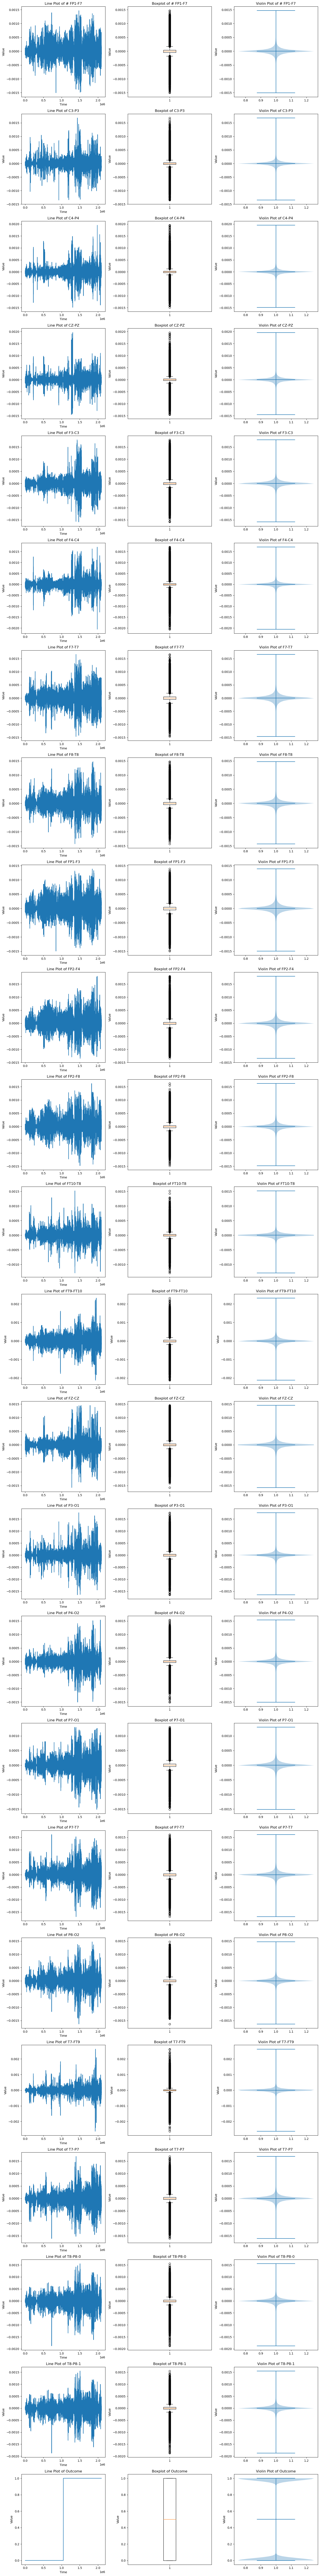

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas dataframe
df = pd.read_csv('/Users/madhavp/DRL/chbmit_preprocessed_data.csv')

# Get the number of columns in the dataframe
num_cols = len(df.columns)

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_cols, ncols=3, figsize=(15, 5*num_cols))

# Iterate over the columns and compare the statistics
for i, col in enumerate(df.columns):
    # Calculate statistics for each column
    mean = df[col].mean()
    median = df[col].median()
    min_val = df[col].min()
    max_val = df[col].max()

    # Print the statistics
    print(f"Column: {col}")
    print(f"Mean: {mean}, Median: {median}, Min: {min_val}, Max: {max_val}")
    print()

    # Plot the comparison in the respective subplots
    # Line Plot
    axes[i, 0].plot(df[col])
    axes[i, 0].set_xlabel('Time')
    axes[i, 0].set_ylabel('Value')
    axes[i, 0].set_title(f"Line Plot of {col}")

    # Box Plot
    axes[i, 1].boxplot(df[col])
    axes[i, 1].set_ylabel('Value')
    axes[i, 1].set_title(f"Boxplot of {col}")

    # Violin Plot
    axes[i, 2].violinplot(df[col], showmedians=True)
    axes[i, 2].set_ylabel('Value')
    axes[i, 2].set_title(f"Violin Plot of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
